In [20]:
import os
import cv2
import numpy as np
from skimage.feature import hog
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score


In [2]:
def resize_and_add_margin(input_folder, output_folder, target_size, final_size):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    data = []
    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')): 
            input_path = os.path.join(input_folder, filename)

            img = cv2.imread(input_path)

            height, width, _ = img.shape

            # Calcula el tamaño de la imagen objetivo
            new_size = max(height, width)
            target_shape = (new_size, new_size)

            # Calcula la posición del área de la imagen en el lienzo negro
            y_pos = (new_size - height) // 2
            x_pos = (new_size - width) // 2

            # Crea un lienzo negro del tamaño objetivo
            canvas = np.zeros((new_size, new_size, 3), dtype=np.uint8)

            # Copia la imagen original en el lienzo negro en la posición calculada
            canvas[y_pos:y_pos+height, x_pos:x_pos+width, :] = img

            # Redimensiona la imagen resultante al tamaño final
            output_path = os.path.join(output_folder, filename)
            resized_img = cv2.resize(canvas, (final_size, final_size))
            
            gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
            features = hog(gray_img)
            data.append(list(features))
            cv2.imwrite(output_path, gray_img)
    columns = [f'HOG_{i}' for i in range(len(features))]
    df = pd.DataFrame(data, columns=columns)
    return df

     HOG_0  HOG_1  HOG_2  HOG_3  HOG_4  HOG_5  HOG_6  HOG_7  HOG_8  HOG_9   
0      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  \
1      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
527    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
528    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
529    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
530    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
531    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

     ...  HOG_72890  HOG_72891  HOG_72892  HOG_72893  HOG_72894  HOG_72895 

c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

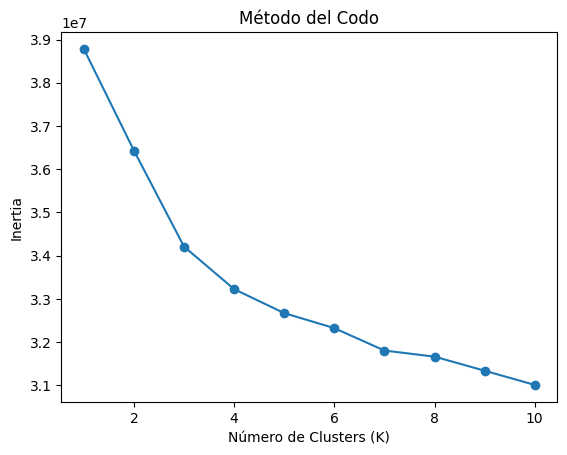

c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


     HOG_0  HOG_1  HOG_2  HOG_3  HOG_4  HOG_5  HOG_6  HOG_7  HOG_8  HOG_9   
0      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  \
1      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
527    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
528    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
529    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
530    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
531    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

     ...  HOG_72891  HOG_72892  HOG_72893  HOG_72894  HOG_72895  HOG_72896 

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

input_folder = 'tokio'
output_folder = 'tokioResize'
target_size = 512  
final_size = 256

df = resize_and_add_margin(input_folder, output_folder, target_size, final_size)
print(df)
df1 = df
X = df.iloc[:, :].values  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inertia')
plt.show()


X = df.iloc[:, :].values 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(df)
df.to_pickle('clasificacion1.pkl')

     HOG_0  HOG_1  HOG_2  HOG_3  HOG_4  HOG_5  HOG_6  HOG_7  HOG_8     HOG_9   
0      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000  \
1      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
2      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
3      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
4      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...       ...   
986    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
987    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
988    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.409865   
989    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.375859   
990    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   

     ...  HOG_72890  HOG_72891  HOG_728

c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

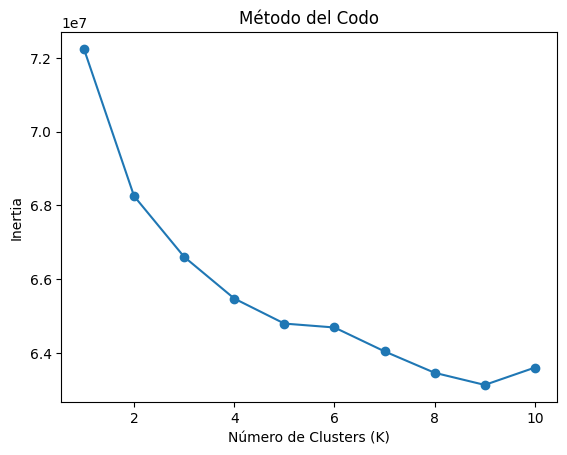

c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


     HOG_0  HOG_1  HOG_2  HOG_3  HOG_4  HOG_5  HOG_6  HOG_7  HOG_8     HOG_9   
0      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000  \
1      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
2      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
3      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
4      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...       ...   
986    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
987    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   
988    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.409865   
989    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.375859   
990    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000   

     ...  HOG_72891  HOG_72892  HOG_728

In [24]:
#metofdo del codo 
input_folder = 'temprano'
output_folder = 'tempranoResize'
target_size = 512  
final_size = 256
df = resize_and_add_margin(input_folder, output_folder, target_size, final_size)
print(df)
df2 = df

X = df.iloc[:, :].values  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertia_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inertia')
plt.show()

X = df.iloc[:, :].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(df)
df.to_pickle('clasificacion2.pkl')

     HOG_0  HOG_1  HOG_2  HOG_3  HOG_4  HOG_5  HOG_6  HOG_7  HOG_8  HOG_9   
0      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  \
1      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
221    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
222    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
223    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
224    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
225    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

     ...  HOG_72890  HOG_72891  HOG_72892  HOG_72893  HOG_72894  HOG_72895 

c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

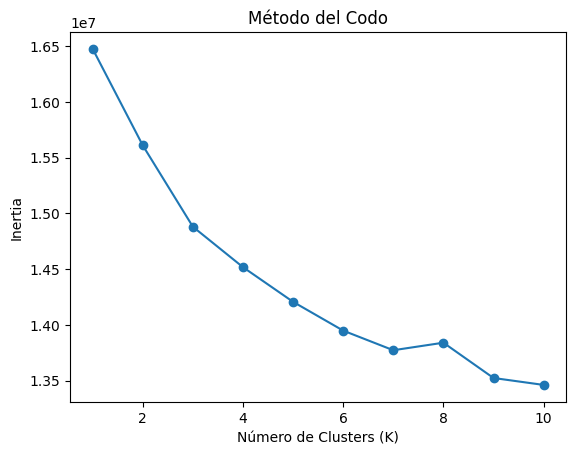

c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


     HOG_0  HOG_1  HOG_2  HOG_3  HOG_4  HOG_5  HOG_6  HOG_7  HOG_8  HOG_9   
0      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  \
1      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
221    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
222    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
223    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
224    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
225    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

     ...  HOG_72891  HOG_72892  HOG_72893  HOG_72894  HOG_72895  HOG_72896 

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

input_folder = 'esquina'
output_folder = 'esquinaResize'
target_size = 512  
final_size = 256

df = resize_and_add_margin(input_folder, output_folder, target_size, final_size)
print(df)
df3 =df
X = df.iloc[:, :].values  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inertia')
plt.show()


X = df.iloc[:, :].values  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(df)
df.to_pickle('clasificacion3.pkl')

In [25]:
df_general = pd.concat([df1, df2, df3], axis=0)
print(df_general)

     HOG_0  HOG_1  HOG_2  HOG_3  HOG_4  HOG_5  HOG_6  HOG_7  HOG_8  HOG_9   
0      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  \
1      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
221    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
222    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
223    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
224    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
225    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

     ...  HOG_72891  HOG_72892  HOG_72893  HOG_72894  HOG_72895  HOG_72896 

c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

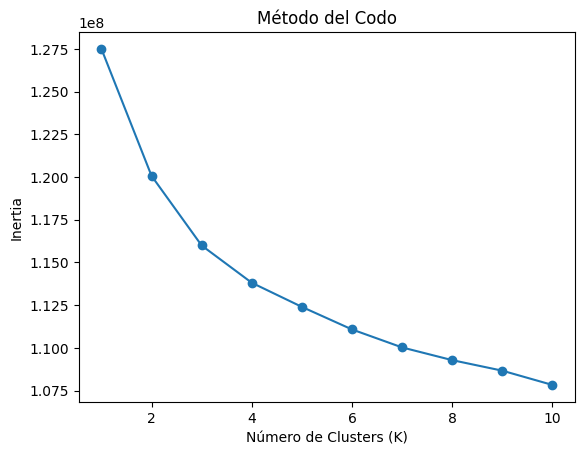

c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


     HOG_0  HOG_1  HOG_2  HOG_3  HOG_4  HOG_5  HOG_6  HOG_7  HOG_8  HOG_9   
0      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  \
1      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
221    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
222    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
223    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
224    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
225    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

     ...  HOG_72891  HOG_72892  HOG_72893  HOG_72894  HOG_72895  HOG_72896 

In [26]:

X = df_general.iloc[:, :-1].values  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inertia')
plt.show()
X = df_general.iloc[:, :-1].values  # Excluye la última columna que contiene las etiquetas

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df_general['Cluster'] = kmeans.fit_predict(X_scaled)

print(df_general)
df_general.to_pickle('clasificacionGeneral.pkl')

In [27]:
inercia = kmeans.inertia_
print("Inercia:", inercia)
silhouette_avg = silhouette_score(X_scaled, df_general['Cluster'])
print("Coeficiente de Silueta:", silhouette_avg)

Inercia: 115993837.80050246
Coeficiente de Silueta: 0.047716069446416556


In [30]:
print(df1.head(20))

    HOG_0  HOG_1  HOG_2  HOG_3  HOG_4  HOG_5  HOG_6  HOG_7  HOG_8  HOG_9  ...   
0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...  \
1     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
2     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
3     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
4     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
5     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
6     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
7     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
8     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
9     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
10    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
11    0.0    0.0    0.0    0

In [29]:
print(df_general.head(10))

   HOG_0  HOG_1  HOG_2  HOG_3  HOG_4  HOG_5  HOG_6  HOG_7  HOG_8  HOG_9  ...   
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...  \
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
5    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
6    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
7    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
8    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
9    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   

   HOG_72891  HOG_72892  HOG_72893  HOG_72894  HOG_72895  HOG_72896   
0        0.0        0.0        0.0        0.0   